In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

BCD = pd.read_csv('breast-cancer.csv')

print(BCD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', 33)
print(BCD.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104         0.096360          0.104341        0.088799             0.048919   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129         0.014064          0.052813        0.079720             0.038803   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000         0.052630          0.019380        0.000000             0.000000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000         0.086370          0.064920        0.029560             0.020310   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000         0.095870  

In [20]:
print(BCD.describe(include=['O']))

       diagnosis
count        569
unique         2
top            B
freq         357


In [21]:
print(BCD.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0    842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710   
1    842517         M        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869              0.07017   
2  84300903         M        19.69         21.25          130.00     1203.0          0.10960           0.15990          0.1974              0.12790   
3  84348301         M        11.42         20.38           77.58      386.1          0.14250           0.28390          0.2414              0.10520   
4  84358402         M        20.29         14.34          135.10     1297.0          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoot

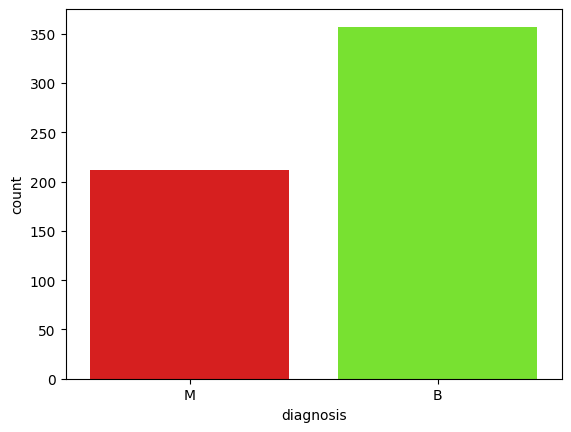

B    357
M    212
Name: diagnosis, dtype: int64


In [23]:
sns.countplot(data = BCD, palette=sns.color_palette(["#f40000","#72ff13"]), x="diagnosis")
plt.show()
print(BCD['diagnosis'].value_counts())

In [24]:
BCD['diagnosis'] = BCD['diagnosis'].map({'B': 0, 'M': 1})
mal = BCD[BCD['diagnosis'] == 1]
ben = BCD[BCD['diagnosis'] == 0]
print(BCD['diagnosis'].value_counts())



0    357
1    212
Name: diagnosis, dtype: int64


In [25]:
print(abs(BCD.corr()['diagnosis']).sort_values(ascending=False)[0:5])#najveća korelacija

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
Name: diagnosis, dtype: float64


In [26]:
print(abs(BCD.corr()['diagnosis']).sort_values(ascending=True)[0:5])#najmanja korelacija

symmetry_se               0.006522
texture_se                0.008303
fractal_dimension_mean    0.012838
id                        0.039769
smoothness_se             0.067016
Name: diagnosis, dtype: float64


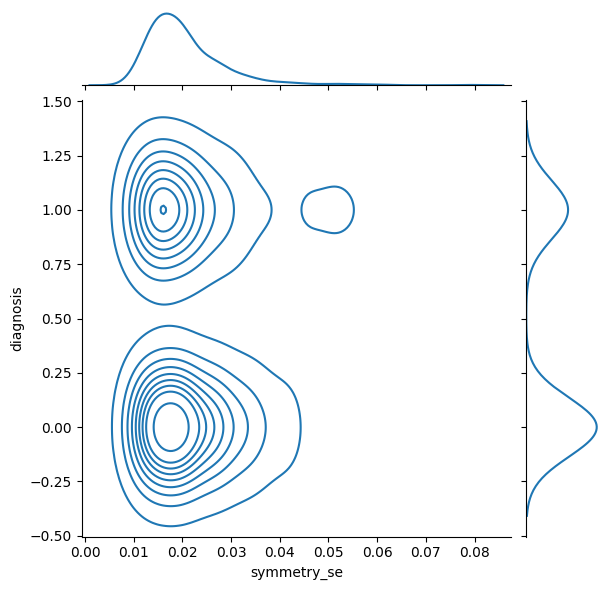

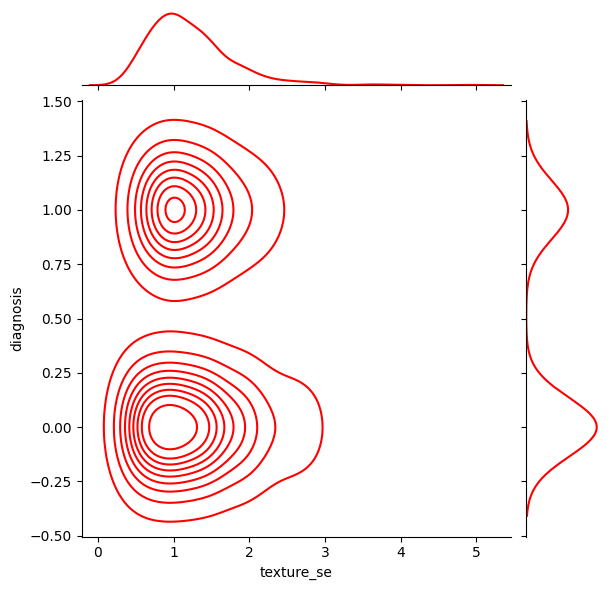

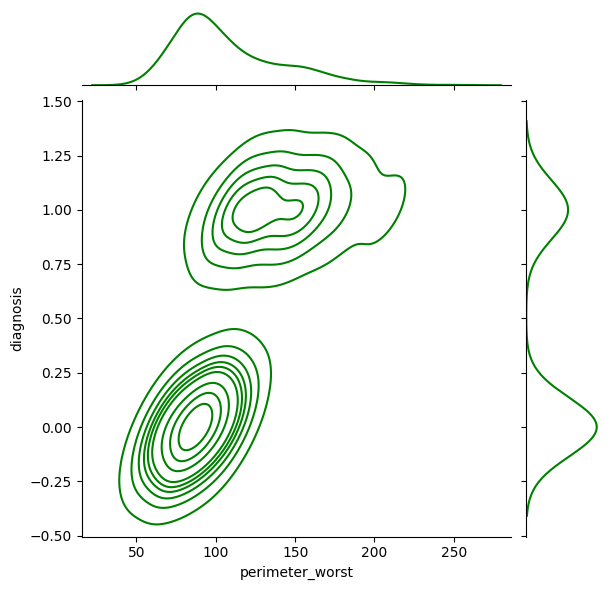

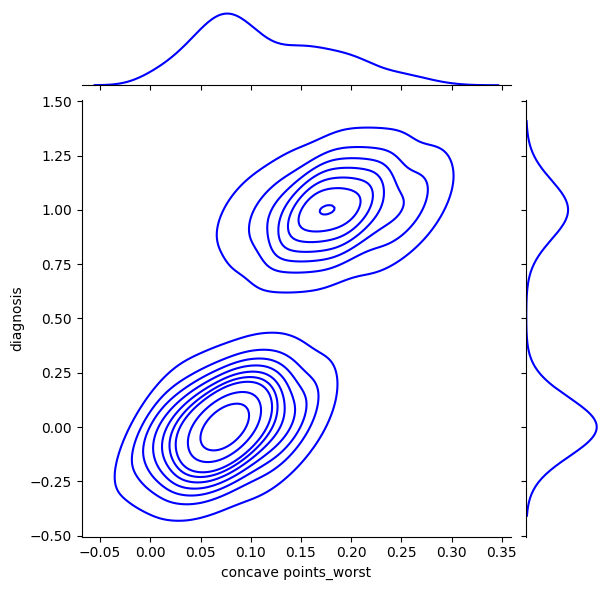

In [27]:
sns.jointplot(x='symmetry_se', y='diagnosis', data=BCD, kind = 'kde')
sns.jointplot(x='texture_se', y='diagnosis', data=BCD, kind = 'kde', color = 'red')
sns.jointplot(x='perimeter_worst', y='diagnosis', data=BCD, kind = 'kde', color = 'green')
sns.jointplot(x='concave points_worst', y='diagnosis', data=BCD, kind = 'kde', color = 'blue')
plt.show()

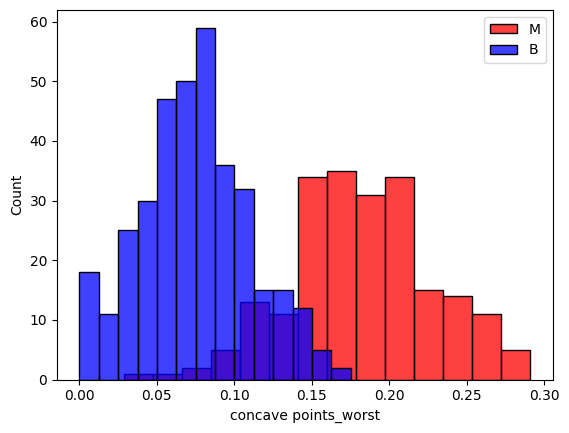

In [28]:
mal = BCD[BCD['diagnosis'] == 1]
ben = BCD[BCD['diagnosis'] == 0]
sns.histplot(mal['concave points_worst'], color = 'red')
sns.histplot(ben['concave points_worst'], color= 'blue')
plt.legend(('M','B'))
plt.show()

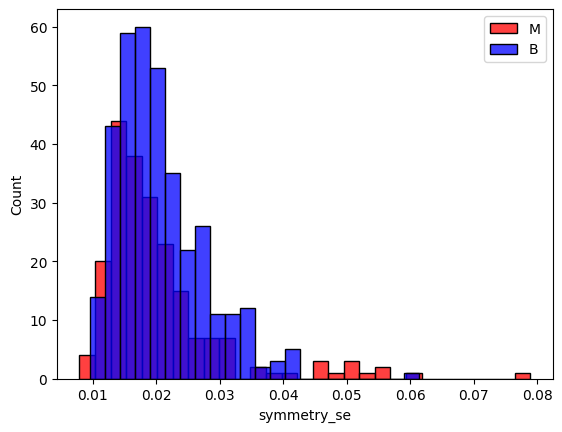

In [29]:
sns.histplot(mal['symmetry_se'], color = 'red')
sns.histplot(ben['symmetry_se'], color = 'blue')
plt.legend(('M','B'))
plt.show()

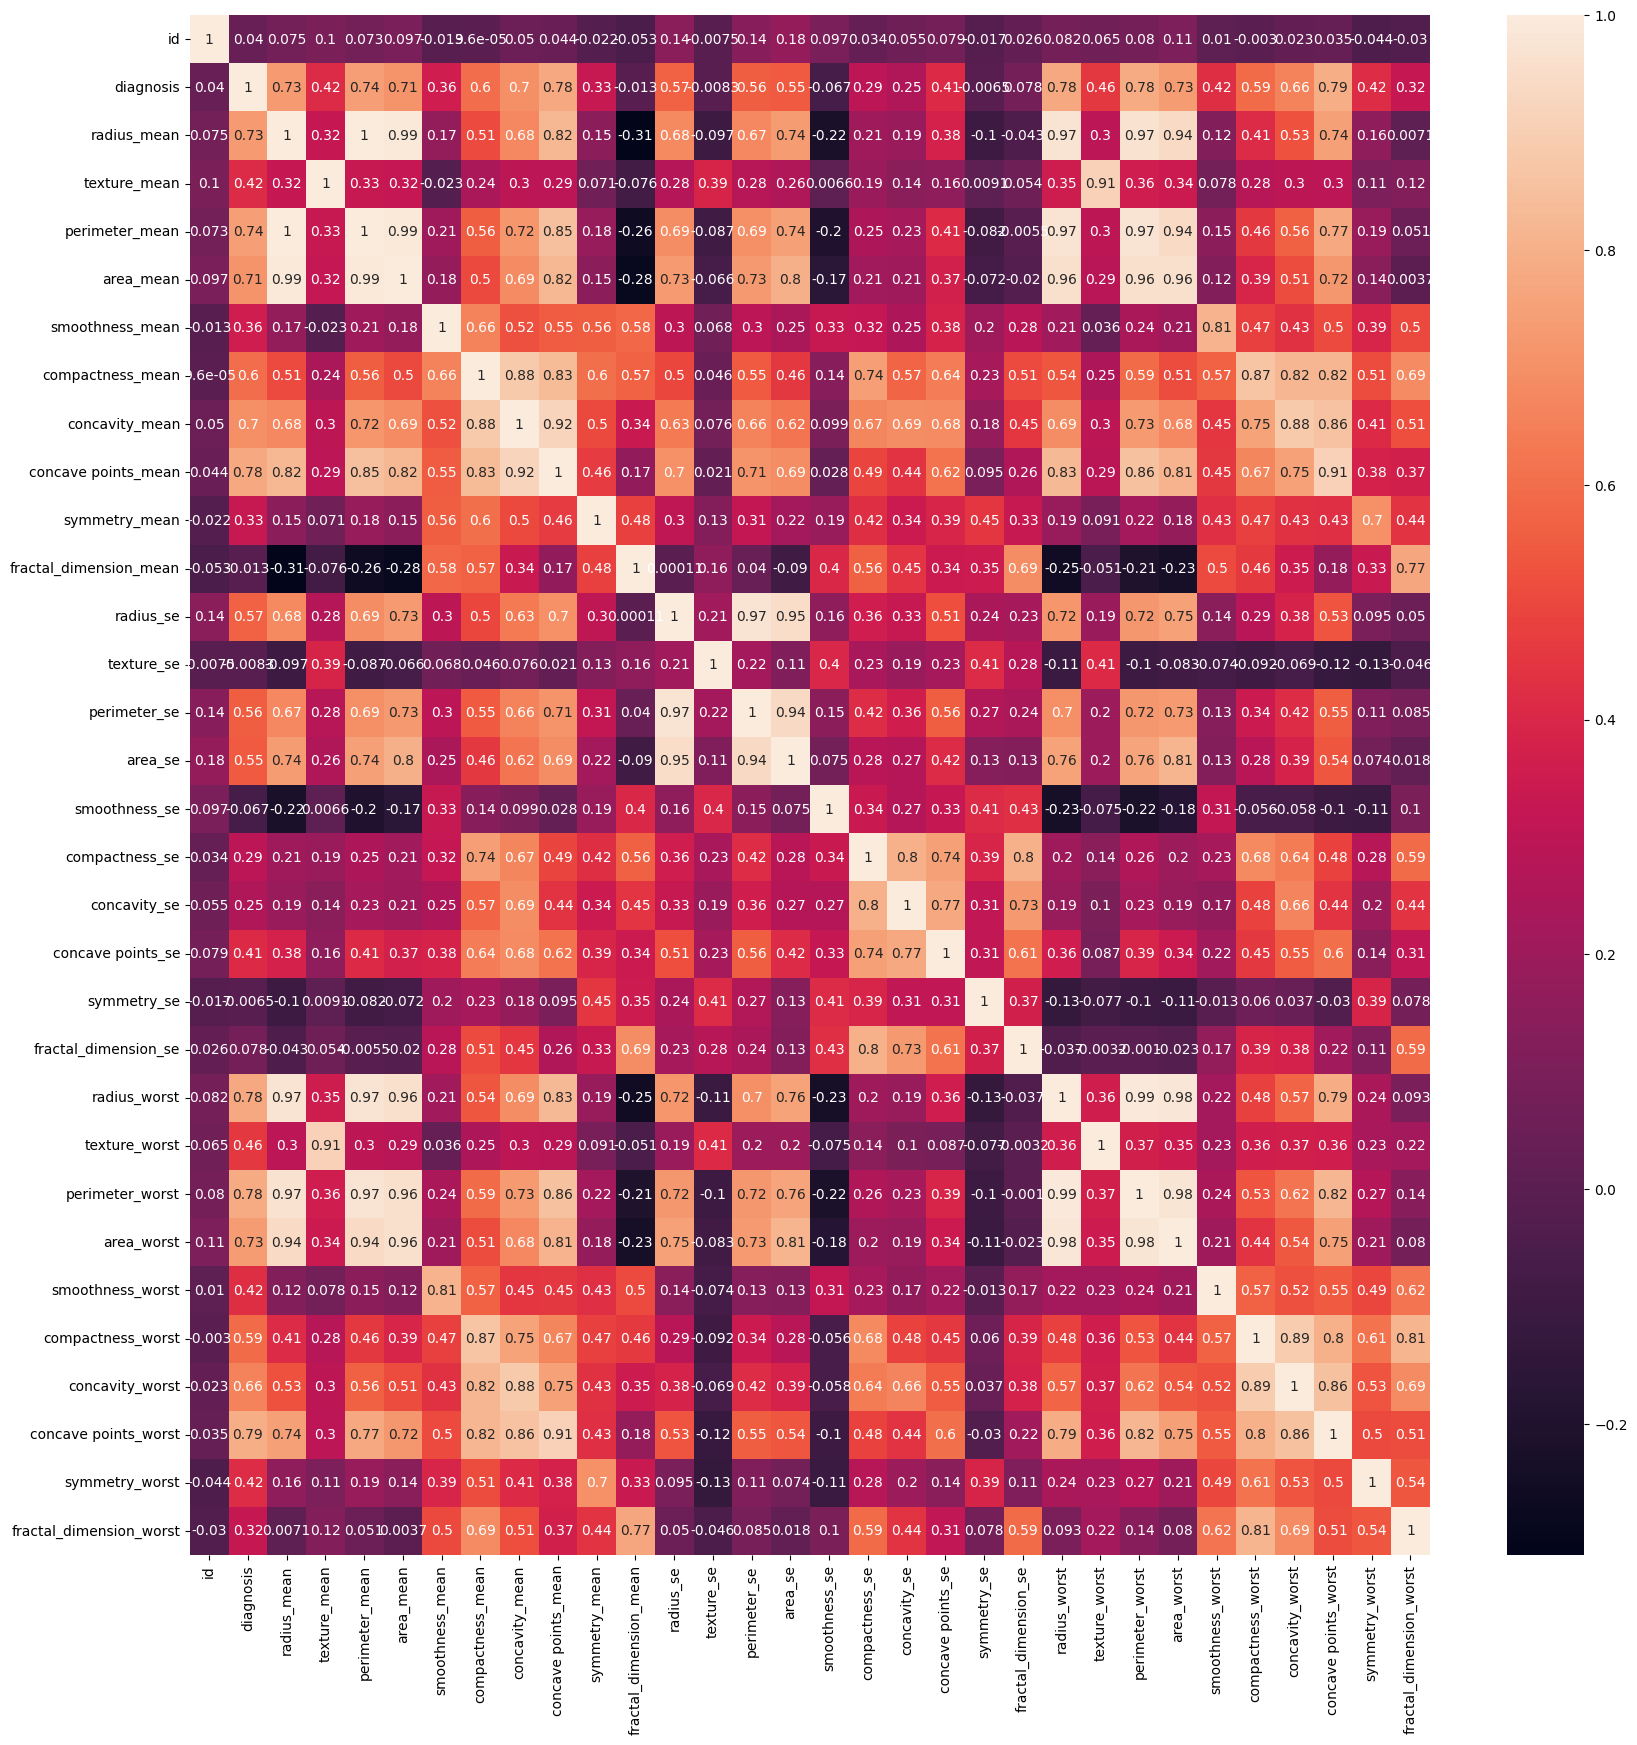

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(BCD.corr(), annot=True)
plt.show()

In [31]:
print(BCD.columns) #preostale kolone

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [32]:
# Formiranje trening i test skupa
X = BCD.drop('diagnosis', axis=1)
y = BCD['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [33]:
#Stablo odlucivanja
modelstablo = DecisionTreeClassifier()
modelstablo.fit(X_train, y_train)
predvidjanje_stablo = modelstablo.predict(X_test)
print(classification_report(y_test, predvidjanje_stablo))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       110
           1       0.92      0.98      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [34]:
accuracy_stablo = accuracy_score(y_test, predvidjanje_stablo)
print('Stablo odlucivanja: accuracy_score: ')
print(accuracy_stablo)

Stablo odlucivanja: accuracy_score: 
0.9649122807017544


In [35]:
print(confusion_matrix(y_test, predvidjanje_stablo))

[[105   5]
 [  1  60]]


In [36]:
tn_stablo, fp_stablo, fn_stablo, tp_stablo = confusion_matrix(y_test, predvidjanje_stablo).ravel()
print('Broj promena za koje je pogresno pretpostavljeno da su maligne: ')
print(fp_stablo)
print('Broj promena za koje je pogresno pretpostavljeno da su benigne: ')
print(fn_stablo)

Broj promena za koje je pogresno pretpostavljeno da su maligne: 
5
Broj promena za koje je pogresno pretpostavljeno da su benigne: 
1


In [37]:
accuracy_GBCmax=0
for i in range(50, 301):
    modelGBC = GradientBoostingClassifier(n_estimators=i, max_depth=3, random_state=41)
    modelGBC.fit(X_train, y_train)
    predvidjanje_GBC = modelGBC.predict(X_test)
    tn_GBC, fp_GBC, fn_GBC, tp_GBC = confusion_matrix(y_test, predvidjanje_GBC).ravel()
    if accuracy_GBCmax < accuracy_score(y_test, predvidjanje_GBC):
        accuracy_GBCmax = accuracy_score(y_test, predvidjanje_GBC)
        modelacc = modelGBC
        n = i
print('Broj estimatora: ')
print(n)

Broj estimatora: 
51
